In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("jobs.csv",index_col = 0)
df[:2]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df["Salary Estimate"] = df["Salary Estimate"].str.replace("\(Glassdoor est.\)", "")
df["Salary Estimate"] = df["Salary Estimate"].str.replace("K", "")
df[['Salary Lower bound','Salary Upper bound']] = df["Salary Estimate"].str.split("-",expand=True)

df["Salary Lower bound"] = df["Salary Lower bound"].str.replace("$", "")
df["Salary Upper bound"] = df["Salary Upper bound"].str.replace("$", "")


# df["Salary Lower bound"] = df["Salary Lower bound"].str.replace(" ", "0")
# df["Salary Upper bound"] = df["Salary Upper bound"].str.replace(" ", "0")

df["Salary Lower bound"] = pd.to_numeric(df["Salary Lower bound"])
df["Salary Upper bound"] = pd.to_numeric(df["Salary Upper bound"])

df[:2]

<ipython-input-4-995c440ef919>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Salary Estimate"] = df["Salary Estimate"].str.replace("\(Glassdoor est.\)", "")
<ipython-input-4-995c440ef919>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Salary Lower bound"] = df["Salary Lower bound"].str.replace("$", "")
<ipython-input-4-995c440ef919>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Salary Upper bound"] = df["Salary Upper bound"].str.replace("$", "")


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound
0,"Data Analyst, Center on Immigration and Justice (CIJ)",$37-$66,Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sift...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66
1,Quality Data Analyst,$37-$66,Overview\n\nProvides analytical and technical support for the integration of multiple data sourc...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66


In [5]:
df[["City", "State", "None"]] = df["Location"] = pd.DataFrame(df.Location.str.split(",", expand = True))
df[:2]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound,City,State,None
0,"Data Analyst, Center on Immigration and Justice (CIJ)",$37-$66,Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sift...,3.2,Vera Institute of Justice\n3.2,New York,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66,New York,NY,None
1,Quality Data Analyst,$37-$66,Overview\n\nProvides analytical and technical support for the integration of multiple data sourc...,3.8,Visiting Nurse Service of New York\n3.8,New York,"New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66,New York,NY,None


In [6]:
arapahoe = df["State"].str.contains("Arapahoe")
df[arapahoe]

df["State"] = df["State"].str.replace("Arapahoe","CO")

In [7]:
location = df.groupby("Location").count()
location[["Job Title"]].sort_values(by = "Job Title", ascending = False)

,Job Title
Location,
New York,310
Chicago,130
San Francisco,119
Austin,81
Los Angeles,80
...,...
Henderson,1
Harrison,1
Hanford,1


In [8]:
less_than_10_jobs = location.loc[location["Job Title"] <= 10]
less_than_10_jobs = less_than_10_jobs[["Job Title"]]
less_than_10_jobs.rename(columns = {"Job Title":"Jobs"}, inplace = True)
less_than_10_jobs[:5]

,Jobs
Location,
Addison,1
Alachua,1
Alameda,1
Alhambra,2
Allegheny West,2


In [9]:
# Location with more than 10 jobs
more_than_10_jobs = location.loc[location["Job Title"] > 10]
more_than_10_jobs = more_than_10_jobs[["Job Title"]]
more_than_10_jobs.rename(columns = {"Job Title":"Jobs"}, inplace = True)
more_than_10_jobs


,Jobs
Location,
Austin,81
Brooklyn,13
Burbank,17
Charlotte,78
Chicago,130
Columbus,29
Cupertino,13
Dallas,66
Denver,47


In [10]:
jobs = more_than_10_jobs["Jobs"].tolist()
locations = more_than_10_jobs.index.tolist()
locations_df = pd.DataFrame()
locations_df["location"] = locations
locations_df["jobs"] = jobs
locations_df

,location,jobs
0,Austin,81
1,Brooklyn,13
2,Burbank,17
3,Charlotte,78
4,Chicago,130
5,Columbus,29
6,Cupertino,13
7,Dallas,66
8,Denver,47
9,El Segundo,19


In [11]:
# New row to add other the other 211 locations
new_row = {'location': "Other", "jobs":int(less_than_10_jobs.count())}
#append row to the dataframe
locations_df = locations_df.append(new_row, ignore_index=True)
locations_df[-5:]

,location,jobs
39,Seattle,30
40,Sunnyvale,16
41,Tempe,31
42,Wilmington,11
43,Other,206


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("bmh")

# States with most jobs


Text(0, 0.5, 'Number of jobs')

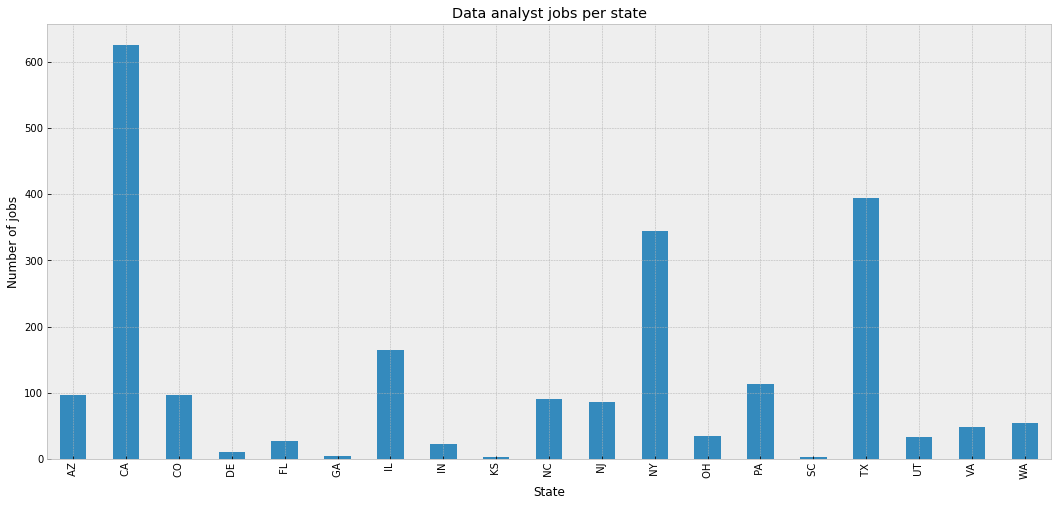

In [13]:
# Jobs per state
state = df.groupby("State").count()
state = state["Job Title"]
state.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per state")
plt.ylabel("Number of jobs")

Text(0, 0.5, 'Number of jobs')

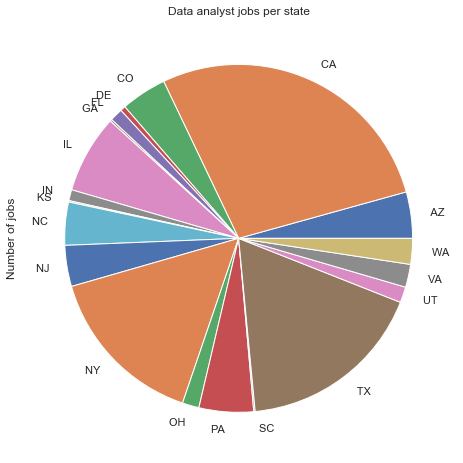

In [62]:
# Jobs per state
state = df.groupby("State").count()
state = state["Job Title"]
state.plot(figsize = (20,8), kind = "pie")
plt.title("Data analyst jobs per state")
plt.ylabel("Number of jobs")

# Sectors with most jobs 

Text(0, 0.5, 'Number of jobs')

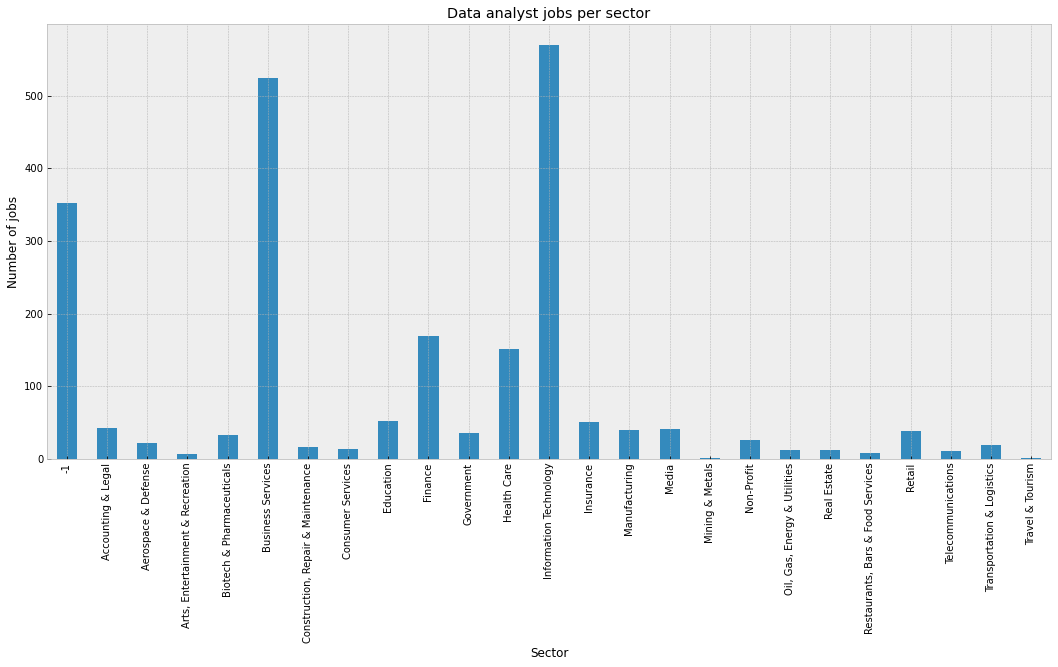

In [14]:
sector = df.groupby("Sector").count()
sector = sector["Job Title"]
sector.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per sector")
plt.ylabel("Number of jobs")

# Ratings vs Jobs 

Text(0, 0.5, 'Number of jobs')

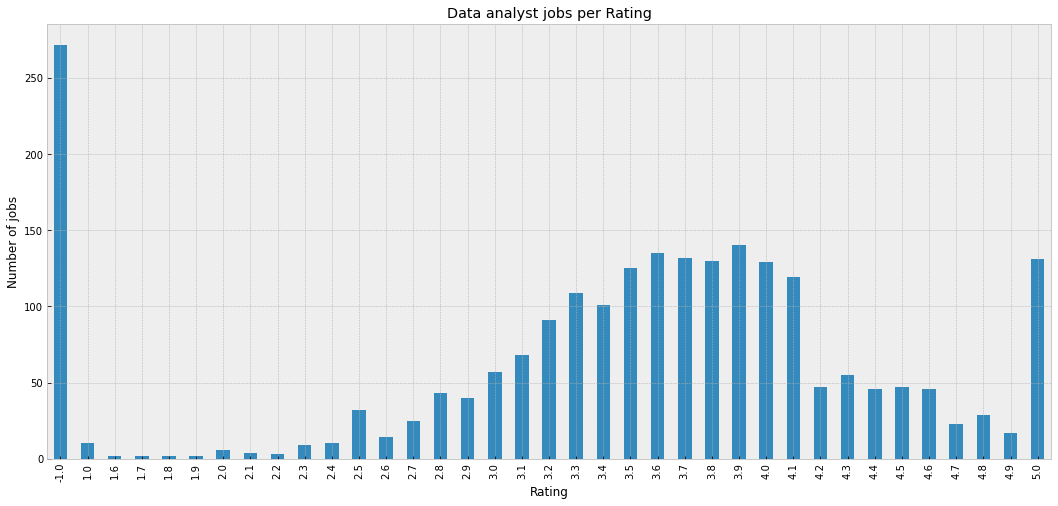

In [15]:
# Jobs per Rating
rating = df.groupby("Rating").count()
rating = rating["Job Title"]
rating.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per Rating")
plt.ylabel("Number of jobs")

In [17]:
five_star_rated_companies = df.loc[df["Rating"] == 5]
five_star_rated_companies.shape

(131, 20)

In [18]:
five_star_rated_companies[:2]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound,City,State,None
26,Data + Business Intelligence Analyst,$37-$66,We are building Duolingo's newly formed FP&A / Strategic Finance team as our revenue grows rapid...,5.0,Duolingo\n5.0,New York,"Pittsburgh, PA",201 to 500 employees,2011,Company - Private,Internet,Information Technology,$10 to $25 million (USD),-1,-1,37.0,66,New York,NY,None
42,Data Analyst,$46-$87,"Whip Media Group's products, including Mediamorph, TV Time and TheTVDB, offer a data-driven inte...",5.0,Whip Media Group\n5.0,New York,"Santa Monica, CA",51 to 200 employees,2016,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,46.0,87,New York,NY,None


In [19]:
top_ten_upper_bound = five_star_rated_companies.sort_values(by = "Salary Upper bound", ascending = False)[:10]
top_ten_upper_bound[["Job Title", "Salary Estimate", "Company Name", "Location"]]

,Job Title,Salary Estimate,Company Name,Location
1484,AI Insights Data Analyst,$110-$190,Moveworks\n5.0,Mountain View
1919,Data Scientist/Analyst - Wilbur Labs,$99-$178,Wilbur Labs\n5.0,San Francisco
1929,Data Studio Analyst,$99-$178,Priceonomics\n5.0,San Francisco
1944,Operations Data Analyst,$93-$159,Turn/River Capital\n5.0,San Francisco
1957,Data Analyst,$93-$159,Softova Inc\n5.0,San Mateo
1962,Junior Data Analyst,$93-$159,"Staffigo Technical Services, LLC\n5.0",San Francisco
1514,Junior Data Analyst,$89-$151,"Staffigo Technical Services, LLC\n5.0",San Jose
1499,Data Analyst,$89-$151,TechNet Inc.\n5.0,San Jose
1522,Data Analyst,$89-$151,"Staffigo Technical Services, LLC\n5.0",San Jose
691,Sr Digital Marketing Data Analyst (PAID SOCIAL),$113-$132,LaBine & Associates\n5.0,Santa Monica


In [20]:
# Top ten jobs with the highest lower bound salary
top_ten_lower_bound = five_star_rated_companies.sort_values(by = "Salary Lower bound", ascending = False)[:10]
top_ten_lower_bound[["Job Title", "Salary Estimate", "Company Name", "Location"]]

,Job Title,Salary Estimate,Company Name,Location
694,"Analyst, Financial Master Data",$113-$132,WB Technology\n5.0,Burbank
691,Sr Digital Marketing Data Analyst (PAID SOCIAL),$113-$132,LaBine & Associates\n5.0,Santa Monica
688,Service Operations Data Analyst,$113-$132,Quinn Group\n5.0,City of Industry
1484,AI Insights Data Analyst,$110-$190,Moveworks\n5.0,Mountain View
1929,Data Studio Analyst,$99-$178,Priceonomics\n5.0,San Francisco
1919,Data Scientist/Analyst - Wilbur Labs,$99-$178,Wilbur Labs\n5.0,San Francisco
385,Regulatory Risk Management Data Analytics and Reporting Analyst,$98-$114,Creative Data Resources\n5.0,New York
390,Data Warehouse systems analyst,$98-$114,ITech Recruiting\n5.0,New York
852,"Sr. Data Analyst - Analytics, Marketing, CPG",$97-$129,Jobot\n5.0,Chicago
860,Sr. Sales Operations & Data Analyst,$97-$129,"Xeris Pharmaceuticals, Inc.\n5.0",Chicago


In [21]:
# Highest paid junior jobs for five star companies - Upper bound
junior_mask = five_star_rated_companies["Job Title"].str.contains("Junior")
best_junior_jobs_ub = five_star_rated_companies[junior_mask].sort_values(by = "Salary Upper bound", ascending = False)[:10]
best_junior_jobs_ub[["Job Title", "Salary Estimate", "Company Name", "Location"]]

,Job Title,Salary Estimate,Company Name,Location
1962,Junior Data Analyst,$93-$159,"Staffigo Technical Services, LLC\n5.0",San Francisco
1514,Junior Data Analyst,$89-$151,"Staffigo Technical Services, LLC\n5.0",San Jose
346,Data Analyst Junior,$77-$132,"Staffigo Technical Services, LLC\n5.0",New York
1294,Data Analyst Junior,$60-$124,"Staffigo Technical Services, LLC\n5.0",San Diego
1260,Junior Data Analyst,$76-$122,"Staffigo Technical Services, LLC\n5.0",San Diego
2135,Data Analyst Junior,$55-$101,"Staffigo Technical Services, LLC\n5.0",Seattle
2226,Data Analyst - Junior,$57-$100,"Staffigo Technical Services, LLC\n5.0",Denver
2221,Data Analyst Junior,$57-$100,"Staffigo Technical Services, LLC\n5.0",Denver
1866,Data Analyst Junior,$53-$99,"Staffigo Technical Services, LLC\n5.0",Charlotte
409,Data Analyst â Junior,$48-$96,"Staffigo Technical Services, LLC\n5.0",New York


In [22]:
# Highest paid junior jobs for five star companies - Lower bound
junior_mask = five_star_rated_companies["Job Title"].str.contains("Junior")
best_junior_jobs_lb = five_star_rated_companies[junior_mask].sort_values(by = "Salary Lower bound", ascending = False)[:10]
best_junior_jobs_lb[["Job Title", "Salary Estimate", "Company Name", "Location"]]

,Job Title,Salary Estimate,Company Name,Location
1962,Junior Data Analyst,$93-$159,"Staffigo Technical Services, LLC\n5.0",San Francisco
1514,Junior Data Analyst,$89-$151,"Staffigo Technical Services, LLC\n5.0",San Jose
346,Data Analyst Junior,$77-$132,"Staffigo Technical Services, LLC\n5.0",New York
1260,Junior Data Analyst,$76-$122,"Staffigo Technical Services, LLC\n5.0",San Diego
759,Junior Data Analyst,$73-$82,"Staffigo Technical Services, LLC\n5.0",Chicago
1294,Data Analyst Junior,$60-$124,"Staffigo Technical Services, LLC\n5.0",San Diego
124,Junior Data Analyst,$59-$85,"Staffigo Technical Services, LLC\n5.0",New York
1601,Data Analyst Junior,$58-$93,"Staffigo Technical Services, LLC\n5.0",San Jose
2226,Data Analyst - Junior,$57-$100,"Staffigo Technical Services, LLC\n5.0",Denver
2221,Data Analyst Junior,$57-$100,"Staffigo Technical Services, LLC\n5.0",Denver


Text(0, 0.5, 'Median salary : Thousands')

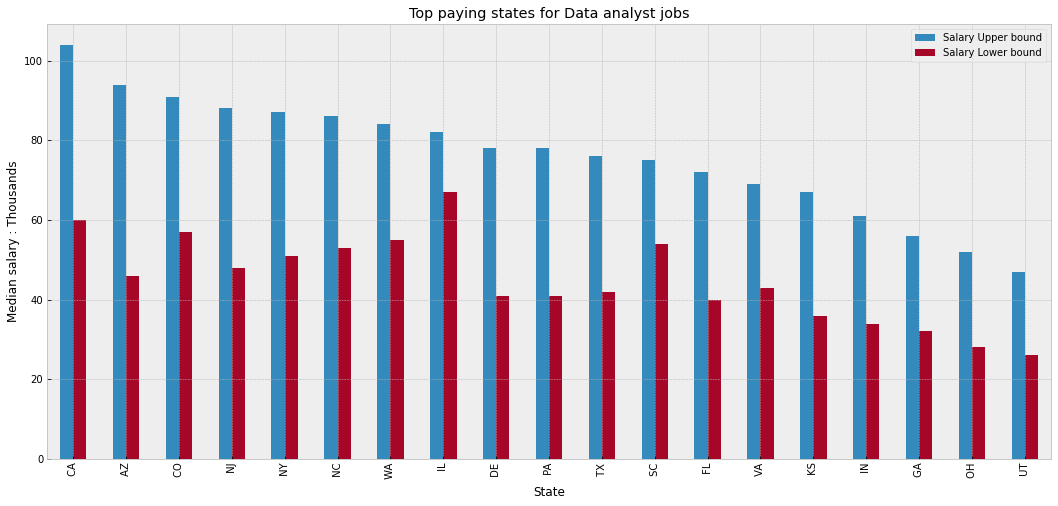

In [48]:
# Highest median paying states
best_paying_jobs_state_ub = df.groupby("State").median().sort_values(by = "Salary Upper bound", 
                                                                  ascending = False)
best_paying_jobs_state_ub[["Salary Upper bound", "Salary Lower bound"]].plot(figsize = (18,8), kind = "bar")


plt.title("Top paying states for Data analyst jobs")
plt.ylabel("Median salary : Thousands")


# Ratings vs State

Text(0, 0.5, 'Rating')

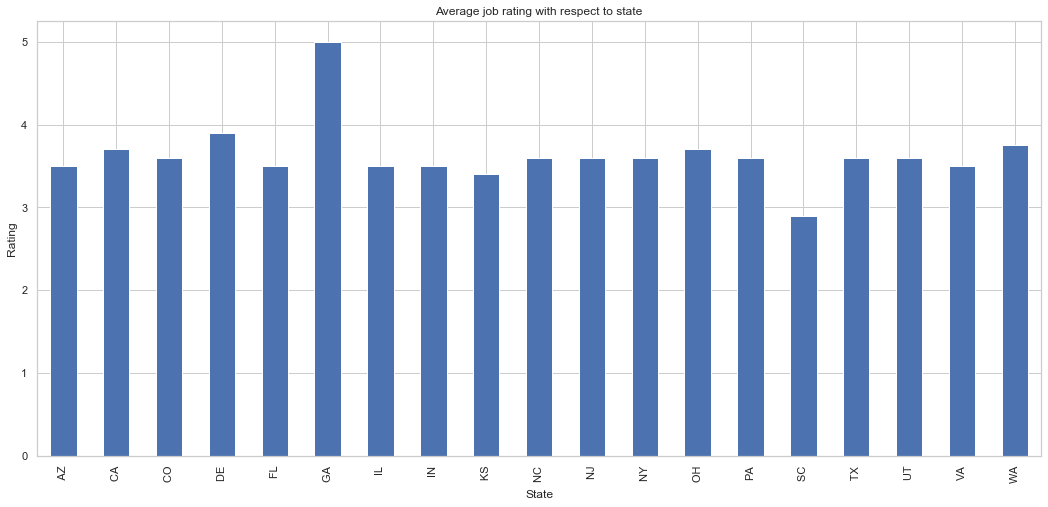

In [60]:
# Best job ratings per state
rating_per_state = df.groupby("State").median()
rating_per_state["Rating"].plot(figsize = (18,8), kind = "bar")
plt.title("Average job rating with respect to state")
plt.ylabel("Rating")

In [53]:
df_comp = df.groupby(['Company Name']).count()[['Job Title']]


In [54]:
df_comp = df_comp.sort_values('Job Title', ascending=False)[:15]


Text(0.5, 1.0, 'Companies with most job offers')

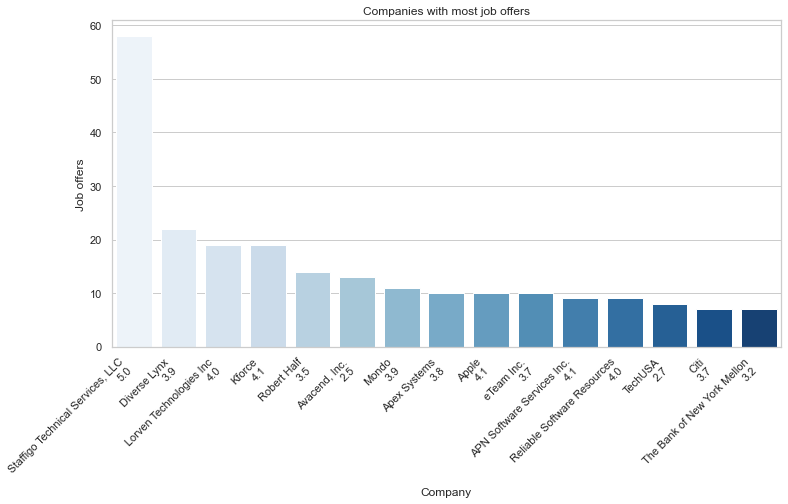

In [59]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_comp.index, y=df_comp["Job Title"],palette='Blues')
ax.set(xlabel='Company', ylabel='Job offers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('Companies with most job offers')